In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/speech-emotion-recognition-en/Savee/JE_h09.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_f12.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_h03.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_d04.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a14.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_h15.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_su02.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_a06.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_n01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_n22.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a10.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_n08.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_sa13.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_a12.wav
/kaggle/input/speech-e

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from IPython.display import Audio, display
from keras.utils import np_utils
import IPython


In [3]:
Crema = "../input/speech-emotion-recognition-en/Crema"

In [4]:
crema_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}

In [5]:
processed_data = []
data_path = '../input/speech-emotion-recognition-en'

for root, dirs, files in os.walk(data_path):
    for file in files:
        file_path = os.path.join(root, file)
    
        dataset = root.split('/')[3]
        if dataset == 'Crema':
            emotion = crema_emotions[file.split('_')[2]]
            processed_data.append([file_path, emotion])

data_df = pd.DataFrame(processed_data, columns = ['File_path', 'Emotion'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


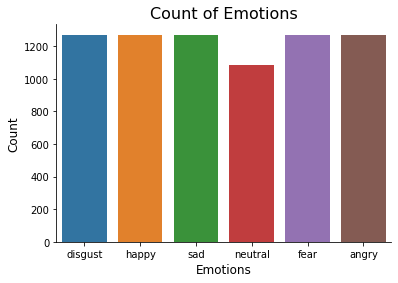

In [6]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [7]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [8]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [9]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

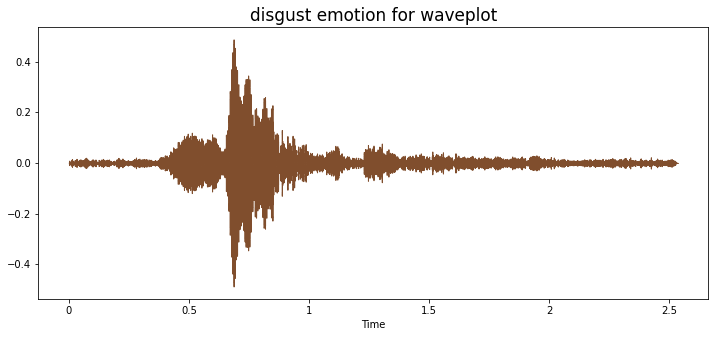

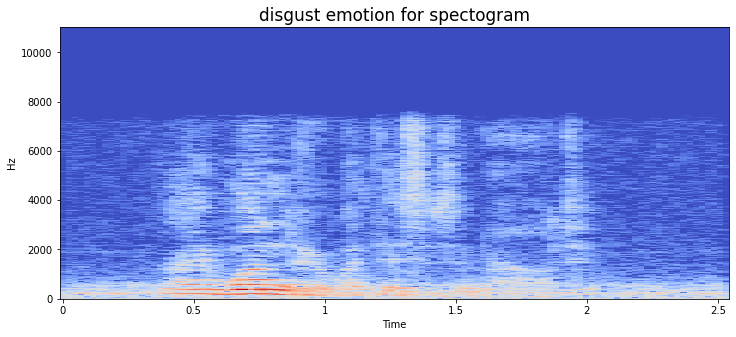

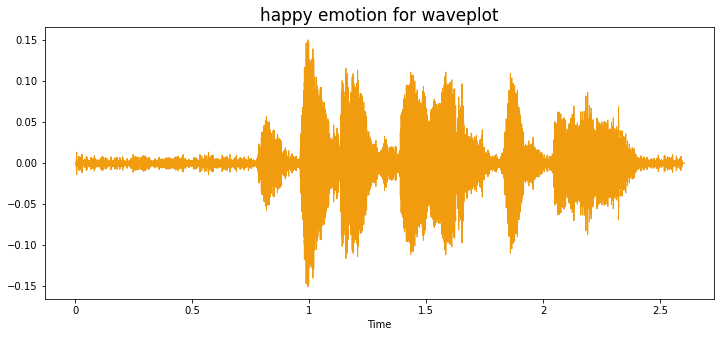

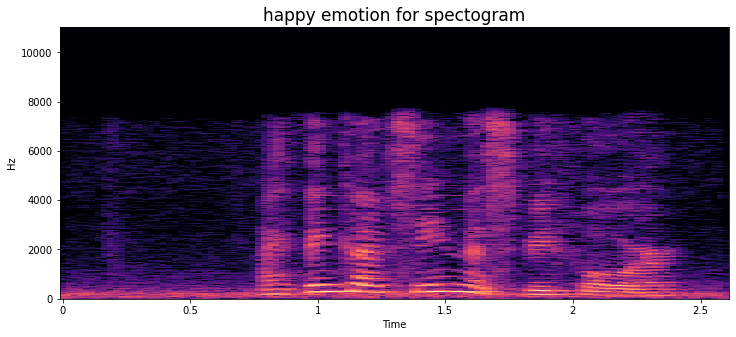

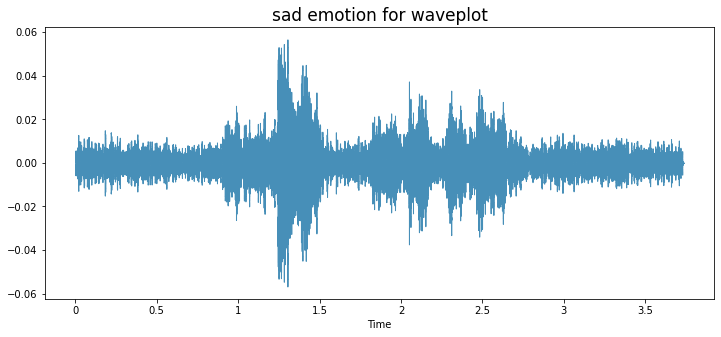

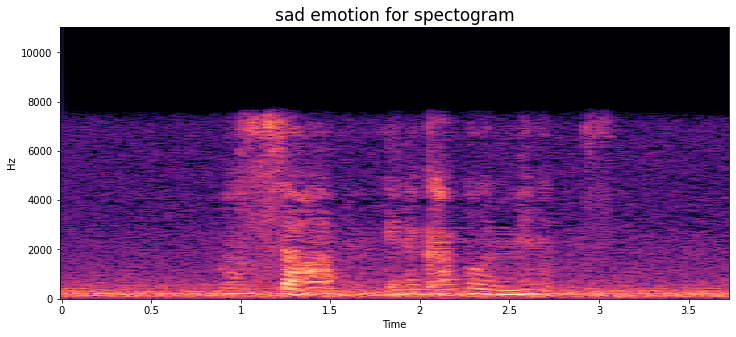

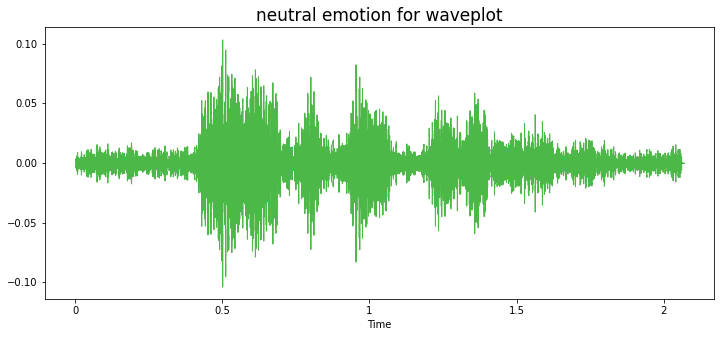

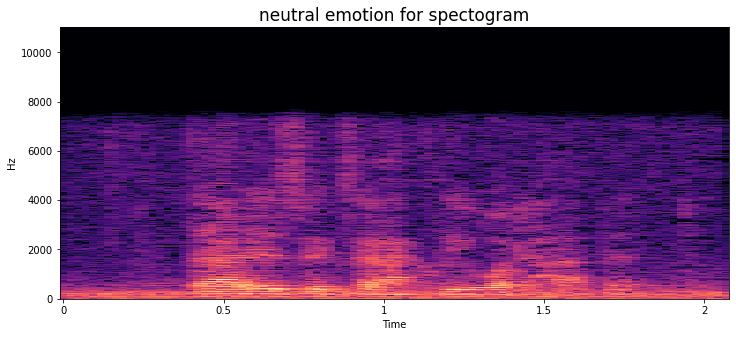

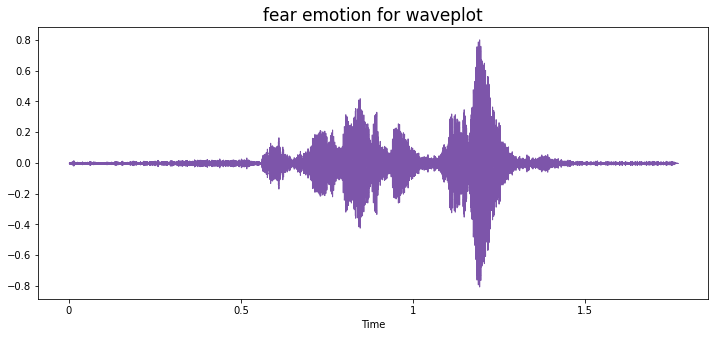

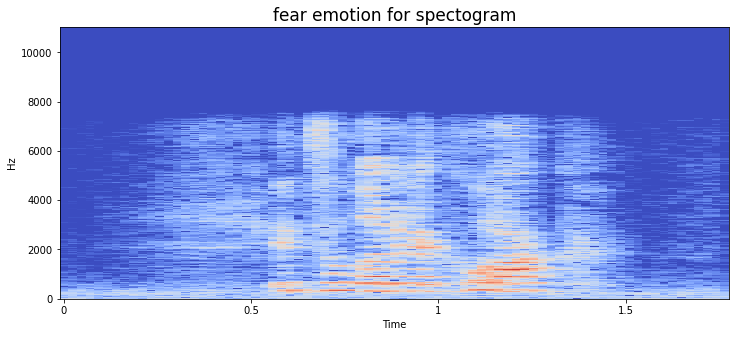

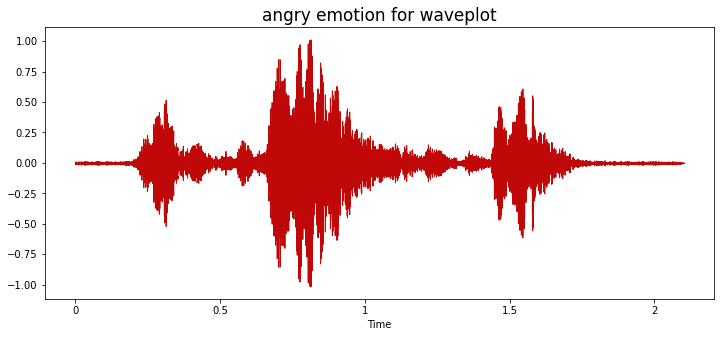

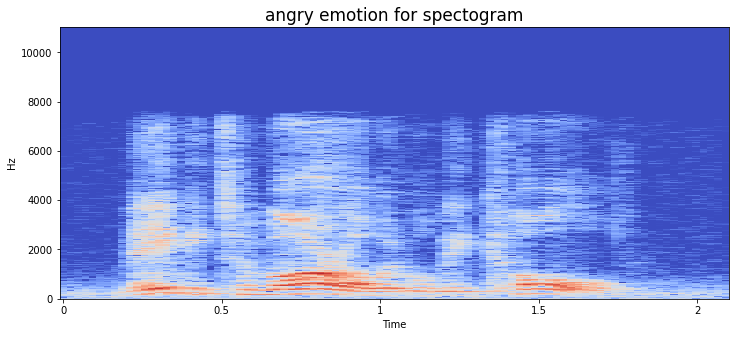

In [10]:
audio_path=[]
for emotion in data_df['Emotion'].unique():
    path=np.array(data_df['File_path'][data_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [11]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [12]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [13]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [14]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [15]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [16]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [17]:
for emotion in crema_emotions.values():
    path = (data_df[data_df.Emotion == emotion].iloc[0])[0]
    data, sampling_rate = librosa.load(path)

In [18]:
def mfcc(data, sampling_rate):
    mfcc_feature = librosa.feature.mfcc(y = data, sr = sampling_rate)
    return np.ravel(mfcc_feature.T)

In [19]:
X, Y = [], []
print('Feature processing...')
for path, emotion, index in zip(data_df.File_path, data_df.Emotion, range(data_df.File_path.shape[0])):
    data, sampling_rate = librosa.load(path, duration = 2.5,  offset = 0.6)
    mfcc_feature = np.mean(librosa.feature.mfcc(y = data, sr = sampling_rate,n_mfcc = 40).T,axis=0)
    if index % 100 == 0:
        print(f"{index} samples has been processed...")
    X.append(mfcc_feature)
    Y.append(emotion)
print('Done.')

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
2000 samples has been processed...
2100 samples has been processed...
2200 samples has been processed...
2300 samples has been processed...
2400 samples has been processed...
2500 samples has been processed...
2600 samples has been processed...
2700 samples has been processed...
2800 sampl

In [20]:
features_path = './features_zcf_rmse_mfcc.csv'


In [21]:
extracted_df = pd.DataFrame(X)
extracted_df['labels'] = Y
extracted_df.to_csv(features_path, index = False)
extracted_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-420.177063,132.454559,2.319086,77.912773,-18.911610,42.647755,-31.870541,13.037222,-13.867411,1.677951,...,-3.015450,6.329108,-1.717116,2.133143,-1.327646,1.720443,-1.651128,-1.015760,2.948064,disgust
1,-446.716583,148.245041,9.763036,47.467365,-18.651981,29.376360,-7.299691,12.948656,-2.658437,4.753531,...,0.091020,3.913711,-3.194658,0.455740,-0.511524,1.708559,2.866394,0.021501,2.068252,happy
2,-387.715149,123.149345,-0.318974,54.765995,-6.632981,22.671337,-22.032187,7.525181,-4.743272,-5.001645,...,-5.280112,0.197610,-6.283927,-1.491402,-2.231974,0.184840,-1.162122,-2.250426,0.719067,happy
3,-366.346069,126.891510,25.824158,46.639019,-6.378326,16.600693,-10.859346,-6.445345,-9.678372,-0.856878,...,-4.650853,0.266452,3.112159,5.009426,5.109719,2.032455,1.826320,0.130986,1.640640,disgust
4,-388.968842,143.976395,0.528379,48.237675,-8.663619,21.925600,-19.387594,5.083047,-6.660646,0.134265,...,-3.787975,2.065387,-0.922018,1.217002,0.175276,0.012597,1.710293,0.109865,1.009157,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-371.484406,157.268158,0.564672,38.269547,-24.614393,4.061705,-4.884541,3.662256,-6.156618,-1.878086,...,-2.593694,0.225376,-1.583046,2.545637,3.709734,-0.339958,-0.567179,-3.843300,-0.390128,neutral
96,-409.296478,132.513077,-7.398647,74.519447,-28.043957,40.411026,-27.962025,15.385401,-8.050572,0.572163,...,-1.419501,6.810245,-3.170765,5.098137,-1.580454,-1.115461,-0.680209,-1.217482,2.808928,fear
97,-428.520935,145.209457,12.832274,62.451153,-1.122364,19.856785,-16.748295,4.152133,-8.301677,-2.802483,...,-1.595097,3.379115,-0.908007,1.131264,3.494095,3.242513,1.989451,-2.563296,1.391796,sad
98,-368.826447,127.102814,15.271214,33.170841,-8.691152,7.956395,-1.704833,2.624444,-10.299099,-0.990856,...,-2.031235,1.745313,-0.296622,1.733426,3.432871,0.971928,1.650597,-0.099068,-1.045667,happy


In [22]:
 from sklearn.model_selection import train_test_split

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(extracted_df.labels)
extracted_df['categorical_label'] = le.transform(extracted_df.labels)

In [24]:
extracted_df['categorical_label']

0       1
1       3
2       3
3       1
4       1
       ..
7437    0
7438    0
7439    0
7440    5
7441    5
Name: categorical_label, Length: 7442, dtype: int64

In [25]:
Y = extracted_df.categorical_label
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

In [26]:
Y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
X = np.array(X)
Y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=42)

In [28]:

x_train = np.expand_dims(x_train, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [29]:
x_train.shape,x_test.shape,x_val.shape

((4948, 40, 1), (2233, 40, 1), (261, 40, 1))

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras.models import Sequential 
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D ,MaxPooling1D , MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report


In [46]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same',
                 activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 1, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 40, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 40, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 20, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 20, 128)           163968    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 128)          

In [47]:
history_spect = model.fit(x_train, y_train,
                                batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
155/155 [==============================] - 8s 48ms/step - loss: 2.1231 - accuracy: 0.1829 - val_loss: 1.7814 - val_accuracy: 0.2261
Epoch 2/10
155/155 [==============================] - 8s 51ms/step - loss: 1.7645 - accuracy: 0.2290 - val_loss: 1.7423 - val_accuracy: 0.2299
Epoch 3/10
155/155 [==============================] - 7s 47ms/step - loss: 1.7329 - accuracy: 0.2443 - val_loss: 1.6521 - val_accuracy: 0.3257
Epoch 4/10
155/155 [==============================] - 7s 47ms/step - loss: 1.7007 - accuracy: 0.2623 - val_loss: 1.6798 - val_accuracy: 0.2874
Epoch 5/10
155/155 [==============================] - 7s 47ms/step - loss: 1.6764 - accuracy: 0.2801 - val_loss: 1.6710 - val_accuracy: 0.2950
Epoch 6/10
155/155 [==============================] - 8s 52ms/step - loss: 1.6651 - accuracy: 0.2757 - val_loss: 1.6368 - val_accuracy: 0.3218
Epoch 7/10
155/155 [==============================] - 7s 47ms/step - loss: 1.6596 - accuracy: 0.2779 - val_loss: 1.6060 - val_accuracy: 0.3218

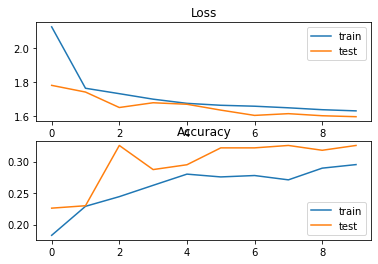

In [57]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history_spect.history['loss'], label='train')
pyplot.plot(history_spect.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_spect.history['accuracy'], label='train')
pyplot.plot(history_spect.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

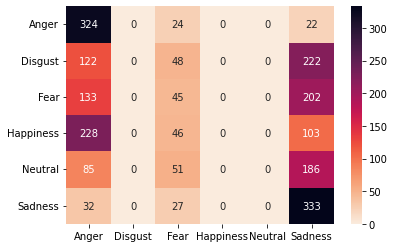

In [48]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r',
                 xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
                 yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [49]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.35      0.88      0.50       370
           1       0.00      0.00      0.00       392
           2       0.19      0.12      0.14       380
           3       0.00      0.00      0.00       377
           4       0.00      0.00      0.00       322
           5       0.31      0.85      0.46       392

    accuracy                           0.31      2233
   macro avg       0.14      0.31      0.18      2233
weighted avg       0.14      0.31      0.19      2233



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


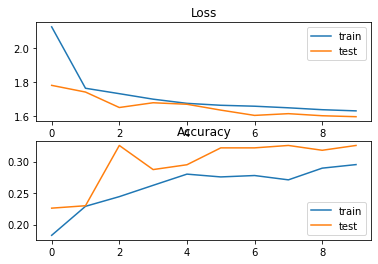

In [41]:
RNN_model = Sequential([
    SimpleRNN(256,input_shape = (40,1)),
    Dense(128,activation = 'relu'),
    Dropout(0.2),
    
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(6,activation='softmax')
])

In [42]:
RNN_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
RNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)               

In [43]:
RNN_history = RNN_model.fit(x_train,
                    y_train,
                   validation_data = (x_val,y_val),epochs = 4)

Epoch 1/4
155/155 [==============================] - 6s 33ms/step - loss: 1.7901 - accuracy: 0.2019 - val_loss: 1.7301 - val_accuracy: 0.2912
Epoch 2/4
155/155 [==============================] - 5s 31ms/step - loss: 1.7809 - accuracy: 0.2037 - val_loss: 1.7429 - val_accuracy: 0.2452
Epoch 3/4
155/155 [==============================] - 5s 35ms/step - loss: 1.7586 - accuracy: 0.2223 - val_loss: 1.7238 - val_accuracy: 0.3065
Epoch 4/4
155/155 [==============================] - 5s 31ms/step - loss: 1.7359 - accuracy: 0.2425 - val_loss: 1.7677 - val_accuracy: 0.2490


In [44]:
RNN_model.evaluate(x_test,y_test)

70/70 [==============================] - 1s 14ms/step - loss: 1.7370 - accuracy: 0.2347


[1.7369685173034668, 0.23466189205646515]

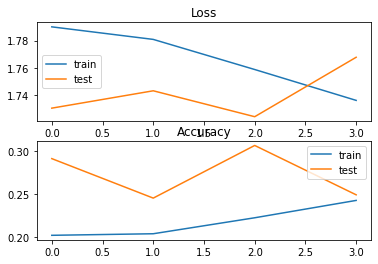

In [53]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(RNN_history.history['loss'], label='train')
pyplot.plot(RNN_history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(RNN_history.history['accuracy'], label='train')
pyplot.plot(RNN_history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

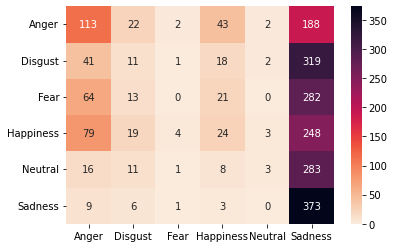

In [55]:
y_pred = RNN_model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r',
                 xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
                 yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [56]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       370
           1       0.13      0.03      0.05       392
           2       0.00      0.00      0.00       380
           3       0.21      0.06      0.10       377
           4       0.30      0.01      0.02       322
           5       0.22      0.95      0.36       392

    accuracy                           0.23      2233
   macro avg       0.20      0.23      0.14      2233
weighted avg       0.20      0.23      0.14      2233

